In [18]:
import numpy as np 
import pandas as pd

In [19]:
dt = pd.read_csv("mushrooms.csv")
print(dt.shape)
dt.head()

(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [20]:
ttype= {"p":0,"e":1}          
dt["class"] = [ttype[item] for item in dt["class"]]


In [21]:
dt_1 = pd.get_dummies(dt) 
print(dt_1.shape)
dt_1.head()

(8124, 118)


,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,False,False,False,False,False,True,False,False,True,...,True,False,False,False,False,False,False,False,True,False
1,1,False,False,False,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,1,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
3,0,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,1,False,False,False,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,False,False


In [27]:
X=dt_1.drop(["class"],axis=1)
y=dt_1["class"]
from sklearn.model_selection import train_test_split
X_tr,X_ts,y_tr,y_ts= train_test_split(X, y, test_size=0.4, random_state=42)

In [28]:
class logistic_regression:
    
    def __init__(self): 
        self.classes = None
        self.theta=[]
        self.lmd = 0
        self.alpha = 0.1
        self.num_iter = 5000
        
    def sigmoid(self,z):
        return 1 / (1 + np.exp(-z))
  
    def cost(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def gradientdescent(self, X, y):
        theta = np.zeros(X.shape[1])
        
        costs = [] 
        
        for i in range(self.num_iter):
            z = np.dot(X, theta)
            h = self.sigmoid(z)
            cost = self.cost(h, y)
            
        gradient = np.dot(X.T, (h - y)) / y.size 
        theta = theta - self.alpha * gradient    
        return theta , costs


    def predict(self, X_test):
        intercept = np.ones((X_test.shape[0], 1))
        X_test = np.concatenate((intercept, X_test), axis=1)
        pred_test = np.zeros((len(self.classes),len(X_test)))

        for i in range(len(self.classes)):
            pred_test[i,:] = self.sigmoid(np.dot(X_test,self.theta[i])) 
        
        prediction_test = np.argmax(pred_test, axis=0)
        return prediction_test
    
    def train(self,X_train, y_train):
        intercept = np.ones((X_train.shape[0], 1))
        X_train = np.concatenate((intercept, X_train), axis=1)
    
        self.classes=set(y_train)
        self.t=[]
        
        for clss in self.classes:
            
            ynew = np.array(y_train == clss, dtype = int)
            theta_onevsrest,costs_onevsrest=self.gradientdescent(X_train, ynew)
            self.theta.append(theta_onevsrest)

ob = logistic_regression()
ob.train(X_tr,y_tr)
y_pred = ob.predict(X_ts)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_ts, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88      1572
           1       0.84      1.00      0.91      1678

    accuracy                           0.90      3250
   macro avg       0.92      0.89      0.90      3250
weighted avg       0.91      0.90      0.90      3250



In [30]:
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, weight='bold', fontsize=16)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", fontsize=12, weight='bold',
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=16, weight='bold')
    plt.xlabel('Predicted label', fontsize=16, weight='bold')

Normalized confusion matrix


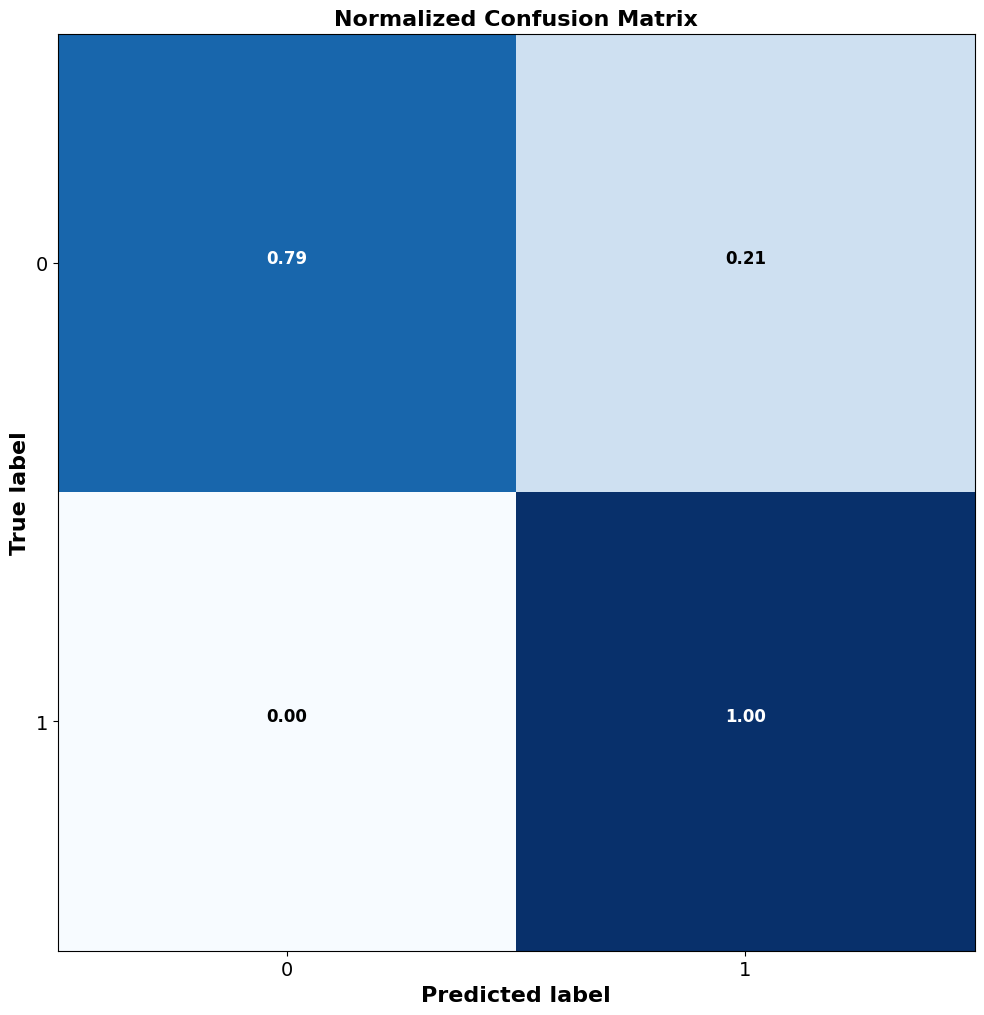

In [31]:
cnf_matrix = confusion_matrix(y_ts, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=list(ob.classes),normalize=True,
                      title='Normalized Confusion Matrix')
plt.show()